In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in data
#df = pd.read_csv('../data/cleaned_311.csv')
df = pd.read_csv('../../data/311_cleaned_v2.csv')

C:\Users\kmfoc\AppData\Local\Temp\ipykernel_30696\215079703.py:8: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/311_cleaned_v2.csv')


In [2]:
original_df = pd.read_csv('../../data/311.csv')

C:\Users\kmfoc\AppData\Local\Temp\ipykernel_22360\4201295390.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv('../../data/311.csv')


In [4]:
df.head()

,case_enquiry_id,open_dt,closed_dt,on_time,case_status,closure_reason,subject,reason,type,queue,...,source,resolution_time,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter
0,101000295613,2011-06-30 21:32:33,2011-07-01 01:06:58,ONTIME,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,...,Employee Generated,0.148900,2011,6,30,21,32,3,181,2
1,101000295614,2011-06-30 22:18:31,2011-07-01 02:12:43,ONTIME,Closed,closed,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,...,Self Service,0.162639,2011,6,30,22,18,3,181,2
2,101000295615,2011-06-30 22:28:04,2011-08-01 11:21:46,ONTIME,Closed,resolved,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,...,Self Service,31.537292,2011,6,30,22,28,3,181,2
3,101000295616,2011-06-30 23:03:48,2011-07-22 12:13:45,OVERDUE,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),...,Self Service,21.548576,2011,6,30,23,3,3,181,2
4,101000295617,2011-06-30 23:12:31,2011-07-01 02:12:38,ONTIME,Closed,resolved,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,...,Constituent Call,0.125081,2011,6,30,23,12,3,181,2


In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,case_enquiry_id,fire_district,city_council_district,neighborhood_services_district,location_zipcode,latitude,longitude,resolution_time,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter
count,2708648.00,2708648.00,2708648.00,2708648.00,2708648.00,2664628.00,2664628.00,2513216.00,2708648.00,2708648.00,2708648.00,2708648.00,2708648.00,2708648.00,2708648.00,2708648.00
mean,101002696621.68,6.66,4.44,8.50,2099.51,42.33,-71.08,31.31,2018.06,6.39,15.63,8.60,29.52,2.50,178.85,2.46
std,1325382.21,3.41,2.73,4.48,710.15,0.08,0.13,159.06,3.34,3.31,8.83,4.45,17.28,1.82,101.01,1.08
min,101000295613.00,-1.00,-1.00,-1.00,0.00,0.00,-73.65,0.00,2011.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00
25%,101001686054.75,4.00,2.00,5.00,2118.00,42.30,-71.11,0.06,2016.00,4.00,8.00,5.00,15.00,1.00,91.00,2.00
50%,101002674796.50,7.00,4.00,9.00,2125.00,42.33,-71.08,0.75,2018.00,7.00,15.00,8.00,30.00,2.00,182.00,3.00
75%,101003793412.50,9.00,7.00,13.00,2130.00,42.35,-71.06,5.71,2021.00,9.00,23.00,12.00,44.00,4.00,260.00,3.00
max,101005086422.00,12.00,9.00,15.00,94066.00,42.40,-0.00,4417.96,2023.00,12.00,31.00,23.00,59.00,6.00,366.00,4.00


<Figure size 1000x1000 with 0 Axes>

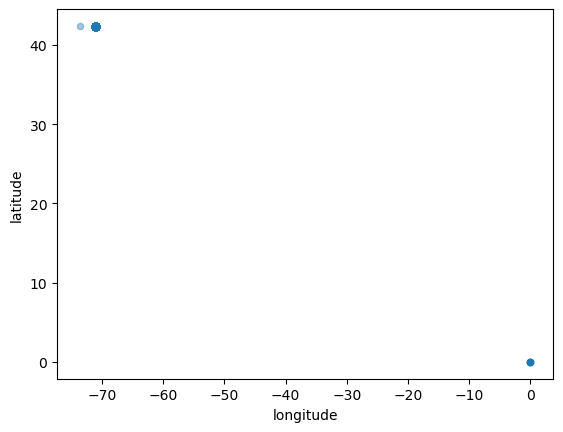

In [3]:
# plot a map of the latitudes and longitudes
plt.figure(figsize=(10,10))
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.show()

In [6]:
def swap(row):
    if row['longitude'] > 40:
        # Swap the values
        return pd.Series([row['latitude'], row['longitude']])
    else:
        return pd.Series([row['longitude'], row['latitude']])

# Apply the function to the DataFrame
df[['longitude', 'latitude']] = df.apply(swap, axis=1)

KeyboardInterrupt: 

<Figure size 1000x1000 with 0 Axes>

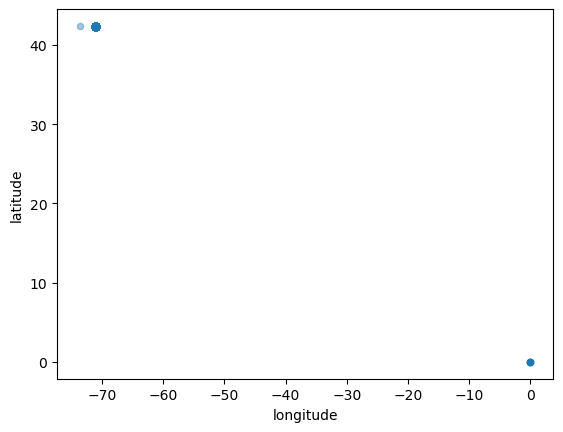

In [ ]:
# plot a map of the latitudes and longitudes
plt.figure(figsize=(10,10))
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.show()

In [4]:
# Round the latitudes and longitudes to ints, in a new column
df['latitude_round'] = df['latitude'].round(0)
df['longitude_round'] = df['longitude'].round(0)

# print unique values
print(df['latitude_round'].unique())
print(df['longitude_round'].unique())

[42. nan  0.]
[-71.  nan  -0. -74.]


<AxesSubplot:xlabel='neighborhood', ylabel='count'>

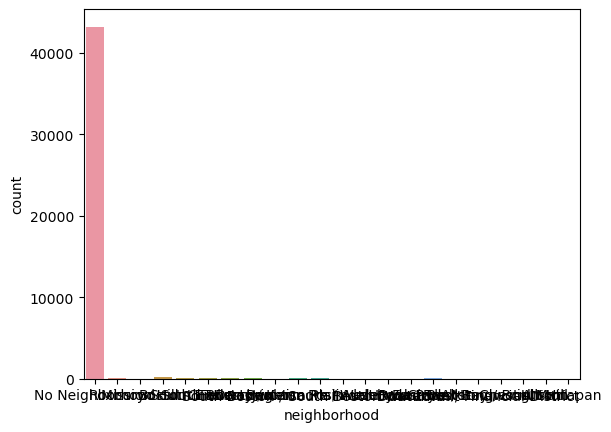

In [ ]:
sns.countplot(x='neighborhood', data=df[df['latitude_round'].isna()])

In [ ]:
# Drop rounded lat/long columns, and resave the dataframe
df.drop(columns=['latitude_round', 'longitude_round'], inplace=True)
#df.to_csv('../../data/311_cleaned_v2.csv', index=False)

In [46]:
# 
grouping = 'subject'
measure = 'resolution_time'
order_reasons = df.loc[df['case_status'] == 'Closed',['subject','resolution_time']].groupby(grouping).agg(['mean','median','min','max','count'])

order_reasons


resolution_time                        \
                                             mean median    min     max   
subject                                                                   
Animal Control                               9.87   0.57   0.00 2086.55   
Boston Police Department                    10.92   0.66   0.00 1694.25   
Boston Water & Sewer Commission             38.45   3.94   0.00 2374.95   
CRM Application                            724.08 724.08 724.08  724.08   
Consumer Affairs & Licensing                 2.44   0.43   0.00   10.67   
Disability Department                        0.27   0.00   0.00  146.12   
Inspectional Services                      111.89   7.84   0.00 4417.96   
Mayor's 24 Hour Hotline                     12.69   0.11   0.00 2790.27   
Neighborhood Services                       30.12   7.44   0.00  410.77   
Parks & Recreation Department               93.73   5.16   0.00 4038.99   
Property Management                         98.76  22.80   0.00 2774.98   
Public Works Department                     18.68   0.67   0.00 4381.96   
Transportation - Traffic Division           17.08   0.30   0.00 3394.79   
Veterans                                    17.97  17.97  17.97   17.97   

                                            
                                     count  
subject                                     
Animal Control                       15492  
Boston Police Department               427  
Boston Water & Sewer Commission       9862  
CRM Application                          1  
Consumer Affairs & Licensing             8  
Disability Department                 2112  
Inspectional Services               194763  
Mayor's 24 Hour Hotline              95118  
Neighborhood Services                  125  
Parks & Recreation Department       153979  
Property Management                  42803  
Public Works Department            1466408  
Transportation - Traffic Division   532117  
Veterans                                 1

In [47]:
df['resolution_time'].describe()

count   2513216.00
mean         31.31
std         159.06
min           0.00
25%           0.06
50%           0.75
75%           5.71
max        4417.96
Name: resolution_time, dtype: float64

In [31]:
def plot_box(df, grouping, measure):
    # Calculate the median and sort the categories
    ordered_reasons = df[df['case_status'] == 'Closed'].groupby(grouping).median().sort_values(measure, ascending=False).index

    # Print median values for each category
    print(ordered_reasons)
    
    # Filter the DataFrame for 'Closed' case_status
    closed_df = df[df['case_status'] == 'Closed']
    
    # Create the boxplot
    plt.figure(figsize=(20,12))
    sns.boxplot(
        x=grouping, 
        y=measure, 
        data=closed_df, 
        palette='Set2', 
        order=ordered_reasons
    )

    plt.xlabel(grouping)
    plt.ylabel(measure)
    plt.yscale('log')

    # Add count labels above the x-ticks
    counts = closed_df[grouping].value_counts().loc[ordered_reasons]
    for i, count in enumerate(counts):
        plt.text(i, plt.gca().get_ylim()[1], f'N={count}', ha='center', va='bottom', fontdict={'size':8})

    # Set the x-ticks to match the ordered reasons
    plt.xticks(ticks=range(len(ordered_reasons)), labels=ordered_reasons, rotation=90)

    plt.show()

In [32]:
plot_box(df, grouping = 'subject', measure = 'resolution_time')

KeyError: 'subject'

In [13]:
import math
# resolution time log_order set to -1 if resolution time is 0
df['log_order'] = df['resolution_time'].apply(lambda x: -10 if x == 0 or np.isnan(x) else math.floor(np.log10(x)))
df['log_order'].value_counts()

 0     678494
-1     638389
-2     520107
 1     294741
-10    213099
 2     129052
-3     118159
-5      67659
-4      33220
 3      15728
Name: log_order, dtype: int64

In [14]:
df[df['log_order'] == 3].head()

,case_enquiry_id,open_dt,closed_dt,case_status,closure_reason,subject,reason,type,queue,department,...,resolution_time,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter,log_order
225,101000295860,2011-07-01 06:52:28,2014-04-17 05:05:25,Closed,adclsd,Inspectional Services,Building,Work w/out Permit,ISD_Building (INTERNAL),ISD,...,1020.925660,2011,7,1,6,52,4,182,3,3
306,101000295954,2011-07-01 09:58:00,2017-05-07 02:40:28,Closed,duplicate,Parks & Recreation Department,Park Maintenance & Safety,Park Maintenance Requests,PARK_Tree in Park,PARK,...,2136.696157,2011,7,1,9,58,4,182,3,3
315,101000295964,2011-07-01 10:16:38,2014-05-28 10:51:12,Closed,adclsd,Inspectional Services,Building,Work w/out Permit,ISD_Building (INTERNAL),ISD,...,1062.024005,2011,7,1,10,16,4,182,3,3
433,101000296145,2011-07-02 10:39:48,2014-04-25 04:07:25,Closed,adclsd,Inspectional Services,Building,Electrical,ISD_Building (INTERNAL),ISD,...,1027.727512,2011,7,2,10,39,5,183,3,3
498,101000296267,2011-07-03 12:32:19,2014-04-25 04:05:40,Closed,adclsd,Inspectional Services,Building,Electrical,ISD_Building (INTERNAL),ISD,...,1026.648160,2011,7,3,12,32,6,184,3,3


In [18]:
# filter closure_reason to ones that have the word adclsd in lowrcase
original_df[original_df['closure_reason'].str.lower().str.contains('adclsd')].head()


,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
90,101000295707,2011-07-01 04:25:57,2011-07-08 04:25:57,2012-02-09 11:19:36,OVERDUE,Closed,Case Closed ADCLSD: Administratively Closed,Zoning,Inspectional Services,Building,...,Jamaica Plain,11,Ward 11,1106,31 Germania St,2130.0,42.314412,-71.103009,0101000020E610000033C904B297C651C003547CA93E28...,Self Service
96,101000295714,2011-07-01 04:37:40,2011-07-02 04:37:40,2011-12-08 04:40:59,OVERDUE,Closed,Case Closed ADCLSD: Administratively Closed,Unsafe/Dangerous Conditions,Inspectional Services,Building,...,Allston / Brighton,15,Ward 22,2204,44 S Crescent Cirt,2135.0,42.348050,-71.167541,0101000020E610000095E1B0FCB8CA51C0706632E48C2C...,Constituent Call
99,101000295717,2011-07-01 04:43:23,2011-07-03 04:43:23,2013-02-04 02:43:39,OVERDUE,Closed,Case Closed ADCLSD: Administratively Closed,Work w/out Permit,Inspectional Services,Building,...,Dorchester,5,Ward 7,0708,28 Rawson St,2125.0,42.326070,-71.058111,0101000020E610000009CC2D15B8C351C018E967A5BC29...,Constituent Call
146,101000295777,2011-07-01 06:10:36,2011-07-03 06:10:36,2013-02-04 02:43:40,OVERDUE,Closed,Case Closed ADCLSD: Administratively Closed,Work w/out Permit,Inspectional Services,Building,...,Dorchester,5,Ward 7,0708,33-35 Locust St,2125.0,42.323279,-71.055292,0101000020E610000079F46FE589C351C01A4FC5306129...,Constituent Call
190,101000295824,2011-07-01 06:29:33,2011-10-29 06:29:32,2011-07-12 11:06:42,ONTIME,Closed,Case Closed ADCLSD: Administratively Closed,Unsatisfactory Living Conditions,Inspectional Services,Housing,...,Dorchester,7,Ward 16,1610,36 Mckone St,2122.0,42.290610,-71.047511,0101000020E6100000AA07CA690AC351C0DE7843B13225...,Constituent Call


In [19]:
original_df.isnull().sum()

case_enquiry_id                         0
open_dt                                 0
sla_target_dt                      451546
closed_dt                          195432
on_time                               671
case_status                             0
closure_reason                          0
case_title                            544
subject                                 0
reason                                  0
type                                    0
queue                                   0
department                              0
submitted_photo                   2705520
closed_photo                      2459572
location                                0
fire_district                        5591
pwd_district                         1367
city_council_district                 302
police_district                      1087
neighborhood                         2652
neighborhood_services_district        308
ward                                  180
precinct                          

In [151]:
# plot median resolution time by grouping
median_df = df.groupby('neighborhood').median().sort_values('resolution_time', ascending=False)
median_df.head()

C:\Users\kmfoc\AppData\Local\Temp\ipykernel_67832\642188424.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_df = df.groupby('neighborhood').median().sort_values('resolution_time', ascending=False)


,case_enquiry_id,city_council_district,neighborhood_services_district,location_zipcode,latitude,longitude,resolution_time,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter,log_order
neighborhood,,,,,,,,,,,,,,,,
Greater Mattapan,1.010025e+11,4.0,9.0,2126.0,42.283590,-71.089101,1.366933,2018.0,6.0,16.0,8.0,30.0,2.0,182.0,2.0,-1.0
West Roxbury,1.010022e+11,6.0,12.0,2132.0,42.281260,-71.157491,1.217361,2017.0,6.0,15.0,8.0,29.0,2.0,175.0,2.0,-1.0
Mattapan,1.010029e+11,5.0,9.0,2126.0,42.273330,-71.094470,1.098275,2019.0,7.0,16.0,7.0,30.0,2.0,189.0,3.0,-1.0
Hyde Park,1.010025e+11,5.0,10.0,2136.0,42.256742,-71.122118,1.015098,2018.0,6.0,15.0,8.0,30.0,2.0,175.0,2.0,-1.0
No Neighborhood,1.010018e+11,-1.0,-1.0,0.0,42.340236,-71.078886,0.992812,2016.0,6.0,15.0,8.0,30.0,2.0,178.0,2.0,-1.0


C:\Users\kmfoc\AppData\Local\Temp\ipykernel_67832\415754095.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_reason_df = df[df['reason']!= 'Test Cases'].groupby('reason').median().sort_values('resolution_time', ascending=False)


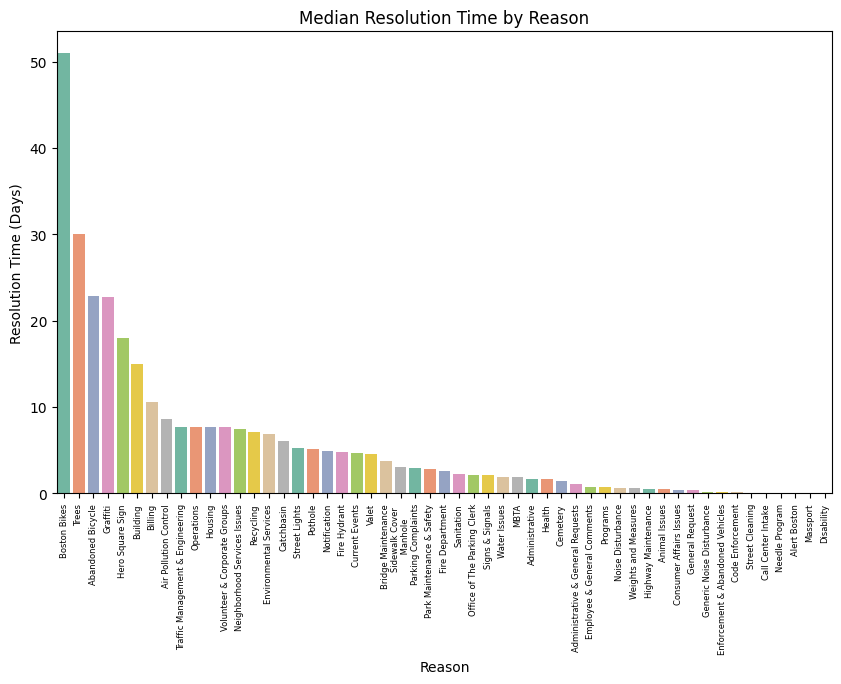

In [167]:
# plot median resolution time by grouping
median_reason_df = df[df['reason']!= 'Test Cases'].groupby('reason').median().sort_values('resolution_time', ascending=False)
median_reason_df.head()

plt.figure(figsize=(10,6))
sns.barplot(x=median_reason_df.index, y='resolution_time', data=median_reason_df, palette='Set2', order=median_reason_df.index)

# Set the parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=6)

# Set the new labels with line breaks at the spaces or customize as needed
new_labels = [label.get_text().replace("/", '\n') for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(new_labels, rotation=90)

plt.xlabel('Reason')
plt.ylabel('Resolution Time (Days)')
plt.title('Median Resolution Time by Reason')

plt.show()

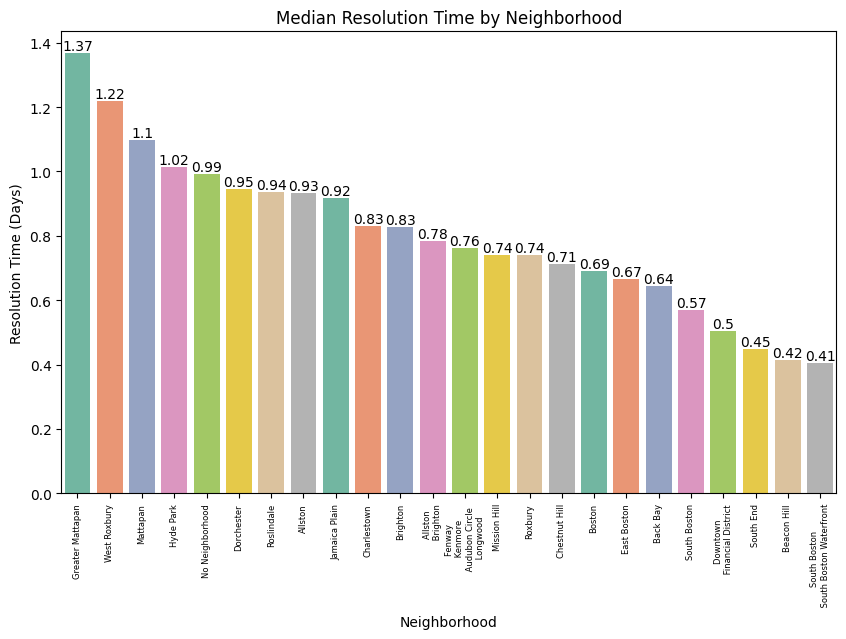

In [152]:
plt.figure(figsize=(10,6))
sns.barplot(x=median_df.index, y='resolution_time', data=median_df, palette='Set2', order=median_df.index)

# Set the parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=6)

# Set the new labels with line breaks at the spaces or customize as needed
new_labels = [label.get_text().replace("/", '\n') for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(new_labels, rotation=90)

plt.xlabel('Neighborhood')
plt.ylabel('Resolution Time (Days)')
plt.title('Median Resolution Time by Neighborhood')

# Label each bar with resolution time
for i, v in enumerate(median_df['resolution_time']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

In [206]:
import folium
import matplotlib.colors as mcolors

# Assuming you start with 'mapping_df' which is a subset of 'df'
mapping_df = df[df['longitude'].notnull()]

# Group by neighborhood and calculate median resolution time
grouped_df = mapping_df.groupby('neighborhood').agg({
    'latitude': 'median',  # Average latitude for the neighborhood
    'longitude': 'median',  # Average longitude for the neighborhood
    'resolution_time': 'median',  # Median resolution time for the neighborhood
}).reset_index()

# Exclude neighborhoods labeled as "No Neighborhood"
grouped_df = grouped_df[grouped_df['neighborhood'] != 'No Neighborhood']

# Generate a color map using a Matplotlib colormap
cmap = plt.cm.get_cmap('hsv', grouped_df['neighborhood'].nunique())
color_map = {neighborhood: mcolors.rgb2hex(cmap(i)) for i, neighborhood in enumerate(grouped_df['neighborhood'].unique())}

# Create a map object centered around the mean latitude and longitude
m = folium.Map(location=[grouped_df['latitude'].mean(), grouped_df['longitude'].mean()], zoom_start=12)

# Add circles to the map
for _, row in grouped_df.iterrows():
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=row['resolution_time'] * 500,  # Adjust the scaling factor as needed
        color=color_map[row['neighborhood']],
        fill=True,
        fill_color=color_map[row['neighborhood']],
        fill_opacity=0.6,
        tooltip=f"Neighborhood: {row['neighborhood']}, Median Resolution Time: {row['resolution_time']} days"
    ).add_to(m)

# Display the map
m

C:\Users\kmfoc\AppData\Local\Temp\ipykernel_67832\605075980.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', grouped_df['neighborhood'].nunique())


In [207]:
# Normalize the resolution time for color mapping
max_resolution_time = grouped_df['resolution_time'].max()
min_resolution_time = grouped_df['resolution_time'].min()
resolution_norm = (grouped_df['resolution_time'] - min_resolution_time) / (max_resolution_time - min_resolution_time)

# Create a color map using a Matplotlib colormap
cmap = plt.cm.get_cmap('cool')
grouped_df['color'] = resolution_norm.apply(lambda x: mcolors.rgb2hex(cmap(x)))

# Create a map object centered around the mean latitude and longitude
m = folium.Map(location=[grouped_df['latitude'].mean(), grouped_df['longitude'].mean()], zoom_start=12)

# Add circles and labels to the map
for _, row in grouped_df.iterrows():
    # Circle
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=row['resolution_time'] * 500,  # Adjust the scaling factor as needed
        color=row['color'],
        fill=True,
        fill_color=row['color'],
        fill_opacity=1
    ).add_to(m)

    # Label
    folium.map.Marker(
        [row['latitude'], row['longitude']],
        icon=folium.DivIcon(html=f"""<div style="font-size: 6pt; color : black">{row['resolution_time']:.2f}</div>""")
    ).add_to(m)

# Display the map
m

C:\Users\kmfoc\AppData\Local\Temp\ipykernel_67832\2234083297.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cool')


In [232]:
# Append  a column for volume request
grouped_df['volume_request'] = mapping_df.groupby('neighborhood').size().reset_index()[0]

#Volume request mapping
max_volume_request = grouped_df['volume_request'].max()
min_volume_request = grouped_df['volume_request'].min()
volume_request_norm = (grouped_df['volume_request'] - min_volume_request) / (max_volume_request - min_volume_request)

# Create a color map using a Matplotlib colormap
cmap = plt.cm.get_cmap('cool')
grouped_df['color'] = volume_request_norm.apply(lambda x: mcolors.rgb2hex(cmap(x)))

# Create a map object centered around the mean latitude and longitude
m = folium.Map(location=[grouped_df['latitude'].mean(), grouped_df['longitude'].mean()], zoom_start=12)

# Add circles and labels to the map
for _, row in grouped_df.iterrows():
    # Circle
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=row['volume_request'] * 2e-3,  # Adjust the scaling factor as needed
        color=row['color'],
        fill=True,
        fill_color=row['color'],
        fill_opacity=1
    ).add_to(m)

    # Label
    folium.map.Marker(
        [row['latitude'], row['longitude']],
        # Use K to format the number with a thousands separator, and divide by 1000 to get the number in thousands
        icon=folium.DivIcon(html=f"""<div style="font-size: 6pt; color : black">{row['volume_request'] / 1000:.0f}K</div>""")
    ).add_to(m)

m

C:\Users\kmfoc\AppData\Local\Temp\ipykernel_67832\919715094.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cool')


In [156]:
# svi_df
svi_df = pd.read_csv('../data/Climate_Ready_Boston_Social_Vulnerability.csv')
svi_df.head()

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,666100.000000,6036.192907
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,250612.382812,2176.592171
2,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,234357.910156,2542.043078
3,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,549614.007812,3224.573044
4,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,466585.238281,3143.610637


In [157]:
svi_df['Name'].unique()

array(['Mission Hill', 'Fenway', 'Back Bay', 'Allston', 'Brighton',
       'Jamaica Plain', 'Roslindale', 'Hyde Park', 'West Roxbury',
       'Mattapan', 'Dorchester', 'East Boston', 'North End', 'West End',
       'Longwood Medical Area', 'Roxbury', 'South Boston Waterfront',
       'Charlestown', 'South End', 'Bay Village', 'Leather District',
       'South Boston', 'Harbor Islands'], dtype=object)

In [158]:
df['neighborhood'].unique()

array(['Greater Mattapan', 'Roslindale', 'West Roxbury', 'Hyde Park',
       'Dorchester', 'Jamaica Plain',
       'Fenway / Kenmore / Audubon Circle / Longwood', 'Roxbury',
       'South Boston / South Boston Waterfront', 'Back Bay',
       'Allston / Brighton', 'East Boston',
       'Downtown / Financial District', 'Boston', 'Charlestown',
       'No Neighborhood', 'Beacon Hill', 'South End', 'Mission Hill',
       'Allston', 'Brighton', 'South Boston', 'Mattapan', 'Chestnut Hill'],
      dtype=object)

In [233]:
# map df neighborhood to svi_df Name
mapping = {
    'Mission Hill': 'Mission Hill',
    'Fenway': 'Fenway / Kenmore / Audubon Circle / Longwood',
    'Back Bay': 'Back Bay',
    'Allston': 'Allston / Brighton',
    'Brighton': 'Allston / Brighton',
    'Jamaica Plain': 'Jamaica Plain',
    'Roslindale': 'Roslindale',
    'Hyde Park': 'Hyde Park',
    'West Roxbury': 'West Roxbury',
    'Mattapan': 'Mattapan',
    'Dorchester': 'Dorchester',
    'East Boston': 'East Boston',
    'North End': 'Downtown / Financial District',
    'West End': 'Downtown / Financial District',
    'Longwood Medical Area': 'Fenway / Kenmore / Audubon Circle / Longwood',
    'Roxbury': 'Roxbury',
    'South Boston Waterfront': 'South Boston / South Boston Waterfront',
    'Charlestown': 'Charlestown',
    'South End': 'South End',
    'Bay Village': 'South End',
    'Leather District': 'Downtown / Financial District',
    'South Boston': 'South Boston / South Boston Waterfront',
    'Harbor Islands': 'South Boston / South Boston Waterfront'    
}
svi_df['neighborhood'] = svi_df['Name'].map(mapping)
svi_df['neighborhood'].unique()

array(['Mission Hill', 'Fenway / Kenmore / Audubon Circle / Longwood',
       'Back Bay', 'Allston / Brighton', 'Jamaica Plain', 'Roslindale',
       'Hyde Park', 'West Roxbury', 'Mattapan', 'Dorchester',
       'East Boston', 'Downtown / Financial District', 'Roxbury',
       'South Boston / South Boston Waterfront', 'Charlestown',
       'South End'], dtype=object)

In [240]:
volume_df = df.groupby('neighborhood').size().reset_index()
volume_df.columns = ['neighborhood', 'volume_request']
volume_df.head(30)


,neighborhood,volume_request
0,Allston,6615
1,Allston / Brighton,191233
2,Back Bay,125802
3,Beacon Hill,72958
4,Boston,82439
5,Brighton,12937
6,Charlestown,88046
7,Chestnut Hill,150
8,Dorchester,398539
9,Downtown / Financial District,154352


In [241]:
svi_df['median_resolution_time'] = svi_df['neighborhood'].map(median_df['resolution_time'])
svi_df['disability_ratio'] = svi_df['TotDis'] / svi_df['POP100_RE']
svi_df['child_ratio'] = svi_df['TotChild'] / svi_df['POP100_RE']
svi_df['elderly_ratio'] = svi_df['OlderAdult'] / svi_df['POP100_RE']
svi_df['low_no_income_ratio'] = svi_df['Low_to_No'] / svi_df['POP100_RE']
svi_df['limited_english_ratio'] = svi_df['LEP'] / svi_df['POP100_RE']
svi_df['poc_ratio'] = svi_df['POC2'] / svi_df['POP100_RE']
svi_df['med_illness_ratio'] = svi_df['MedIllnes'] / svi_df['POP100_RE']
# Add a column for volume request
svi_df['volume_request'] = svi_df['neighborhood'].map(volume_df.set_index('neighborhood')['volume_request'])

In [242]:
pd.set_option('display.max_columns', None)
svi_df.head(20)

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length,neighborhood,median_resolution_time,disability_ratio,child_ratio,elderly_ratio,low_no_income_ratio,limited_english_ratio,poc_ratio,med_illness_ratio,volume_request
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,6.661000e+05,6036.192907,Mission Hill,0.741308,0.085114,0.010866,0.059942,0.215683,0.275625,0.317820,0.385951,49597
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,2.506124e+05,2176.592171,Fenway / Kenmore / Audubon Circle / Longwood,0.762512,0.051401,0.013237,0.009627,0.410349,0.419976,0.300670,0.378398,56003
2,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,2.343579e+05,2542.043078,Back Bay,0.644016,0.030183,0.100970,0.140137,0.025871,0.166008,0.160618,0.436493,125802
3,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,5.496140e+05,3224.573044,Back Bay,0.644016,0.018750,0.035833,0.118750,0.077917,0.196667,0.133333,0.422583,125802
4,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,4.665852e+05,3143.610637,Fenway / Kenmore / Audubon Circle / Longwood,0.762512,0.041286,0.004097,0.011346,0.282067,0.293413,0.327450,0.372449,56003
5,6,25025010802,1673329.62,38.4144,3059,2106,109,232,428,309,737,517,1245.52,Back Bay,2.848372e+05,2666.112457,Back Bay,0.644016,0.035633,0.075842,0.139915,0.101013,0.240928,0.169009,0.407166,125802
6,7,25025010104,3086172.34,70.8488,4804,2136,238,85,382,1024,1406,1664,1865.37,Back Bay,5.252949e+05,3884.933590,Back Bay,0.644016,0.049542,0.017694,0.079517,0.213156,0.292673,0.346378,0.388295,125802
7,8,25025000703,1916064.65,43.9868,2791,1418,99,31,31,1740,1771,1083,1029.60,Allston,3.261537e+05,3052.866729,Allston / Brighton,0.784155,0.035471,0.011107,0.011107,0.623432,0.634540,0.388033,0.368900,191233
8,9,25025000504,3586159.72,82.3269,4985,2726,700,35,837,1967,2804,1123,2113.60,Brighton,6.102491e+05,4370.417415,Allston / Brighton,0.784155,0.140421,0.007021,0.167904,0.394584,0.562487,0.225276,0.423992,191233
9,10,25025000704,2580833.98,59.2478,4801,2405,301,142,113,1560,1673,1928,1802.25,Allston,4.392930e+05,2870.108353,Allston / Brighton,0.784155,0.062695,0.029577,0.023537,0.324932,0.348469,0.401583,0.375391,191233


In [243]:
neighborhood_grouping_svi_df = svi_df.groupby('neighborhood').mean().sort_values('median_resolution_time', ascending=False)
neighborhood_grouping_svi_df.head()

C:\Users\kmfoc\AppData\Local\Temp\ipykernel_67832\2756011331.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  neighborhood_grouping_svi_df = svi_df.groupby('neighborhood').mean().sort_values('median_resolution_time', ascending=False)


,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length,median_resolution_time,disability_ratio,child_ratio,elderly_ratio,low_no_income_ratio,limited_english_ratio,poc_ratio,med_illness_ratio,volume_request
neighborhood,,,,,,,,,,,,,,,,,,,,,,,,
West Roxbury,56.000000,2.502513e+10,2.477885e+07,568.844160,4590.400000,2036.000000,516.000000,951.600000,726.400000,724.400000,1450.800000,1824.200000,1815.780000,4.207415e+06,10559.901774,1.217361,0.112162,0.203819,0.161634,0.154046,0.315680,0.397215,0.398291,111547.0
Mattapan,40.000000,2.502510e+10,8.543651e+06,196.135237,4137.875000,1689.625000,700.625000,1107.375000,509.125000,1191.375000,1700.500000,3534.500000,1549.608750,1.450963e+06,6077.808496,1.098275,0.167194,0.269297,0.119145,0.290683,0.409829,0.877844,0.371877,5094.0
Hyde Park,39.000000,2.502514e+10,1.395809e+07,320.433600,4146.250000,1648.000000,529.250000,814.000000,554.750000,670.750000,1225.500000,2783.000000,1603.115000,2.368379e+06,8381.835772,1.015098,0.113712,0.200139,0.122246,0.141925,0.264171,0.640466,0.386302,122358.0
Dorchester,97.315789,2.502514e+10,6.909129e+06,158.611789,3668.157895,1447.736842,516.789474,917.052632,343.947368,1197.315789,1541.263158,2672.526316,1316.355789,1.174274e+06,6078.635590,0.946574,0.140432,0.250771,0.096432,0.336590,0.433022,0.723483,0.359361,398539.0
Roslindale,71.333333,2.502526e+10,1.290317e+07,296.216139,3387.388889,1397.388889,404.777778,740.222222,457.277778,624.944444,1082.222222,1839.222222,1334.962222,2.191528e+06,7578.644586,0.937454,0.143531,0.203132,0.151152,0.171386,0.322538,0.543956,0.391117,105994.0


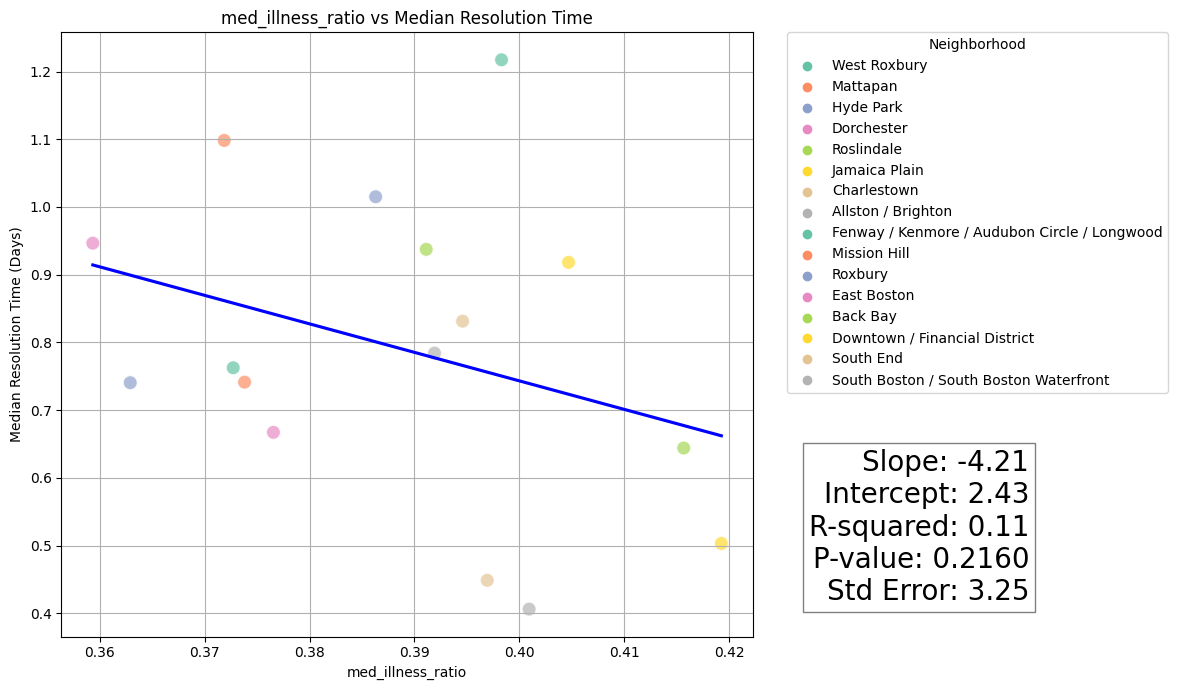

In [244]:
from scipy import stats

# Perform the regression
target_var = 'med_illness_ratio'
X = neighborhood_grouping_svi_df[target_var]
y = neighborhood_grouping_svi_df['median_resolution_time']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# Create the scatter plot
plt.figure(figsize=(12, 7))
# Create scatter plot
scatter = sns.scatterplot(
    x=target_var, 
    y='median_resolution_time', 
    data=neighborhood_grouping_svi_df, 
    hue='neighborhood', 
    palette='Set2', 
    alpha=0.7, 
    s=100  # This increases the size of the scatter points
)

# Add regression line without confidence interval
sns.regplot(
    x=target_var, 
    y='median_resolution_time', 
    data=neighborhood_grouping_svi_df, 
    scatter=False, 
    ci=None,  # This removes the density shading (confidence interval)
    color='blue'
)



# Place the text with statistics on the plot
stats_text = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nR-squared: {r_value**2:.2f}\nP-value: {p_value:.4f}\nStd Error: {std_err:.2f}'
plt.text(1.4, 0.05, stats_text, ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=20, bbox=dict(facecolor='white', alpha=0.5))

# Improve layout
plt.xlabel(target_var)
plt.ylabel('Median Resolution Time (Days)')
plt.title(f'{target_var} vs Median Resolution Time')
plt.grid(True)  # This adds gridlines
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Neighborhood')  # Adjust legend

plt.tight_layout()  # Adjust layout to not cut off the legend
plt.show()

In [245]:
# Plotsize
neighborhood_plotting_df = neighborhood_grouping_svi_df[['child_ratio','disability_ratio', 'elderly_ratio', 'low_no_income_ratio', 'limited_english_ratio', 'poc_ratio', 'med_illness_ratio']]
neighborhood_plotting_df['ratio_sum'] = neighborhood_plotting_df.sum(axis=1)
# add median resolution time
neighborhood_plotting_df['median_resolution_time'] = neighborhood_grouping_svi_df['median_resolution_time']
# add volume request
neighborhood_plotting_df['volume_request'] = neighborhood_grouping_svi_df['volume_request']
neighborhood_plotting_df = neighborhood_plotting_df.sort_values('ratio_sum', ascending=False)
neighborhood_plotting_df.head()

C:\Users\kmfoc\AppData\Local\Temp\ipykernel_67832\2737602627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighborhood_plotting_df['ratio_sum'] = neighborhood_plotting_df.sum(axis=1)
C:\Users\kmfoc\AppData\Local\Temp\ipykernel_67832\2737602627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighborhood_plotting_df['median_resolution_time'] = neighborhood_grouping_svi_df['median_resolution_time']
C:\Users\kmfoc\AppData\Local\Temp\ipykernel_67832\2737602627.py:7: SettingWithCopyWarning: 
A value i

,child_ratio,disability_ratio,elderly_ratio,low_no_income_ratio,limited_english_ratio,poc_ratio,med_illness_ratio,ratio_sum,median_resolution_time,volume_request
neighborhood,,,,,,,,,,
Roxbury,0.243631,0.159555,0.085690,0.430243,0.515933,0.870850,0.362923,2.668824,0.740486,243294.0
Mattapan,0.269297,0.167194,0.119145,0.290683,0.409829,0.877844,0.371877,2.505870,1.098275,5094.0
Dorchester,0.250771,0.140432,0.096432,0.336590,0.433022,0.723483,0.359361,2.340091,0.946574,398539.0
East Boston,0.188128,0.109904,0.094192,0.298613,0.392804,0.577407,0.376561,2.037609,0.667199,165958.0
South End,0.142336,0.112670,0.118571,0.316650,0.435222,0.461764,0.396928,1.984140,0.448634,148814.0


<Figure size 1000x600 with 0 Axes>

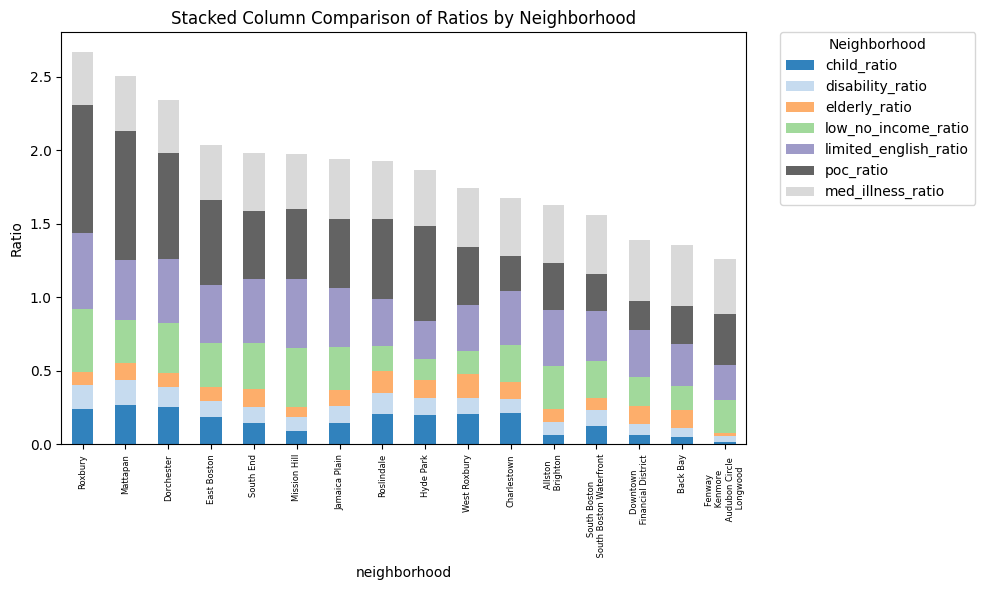

In [246]:
plt.figure(figsize=(10,6))
ax = neighborhood_plotting_df[['child_ratio','disability_ratio', 'elderly_ratio', 'low_no_income_ratio', 'limited_english_ratio', 'poc_ratio', 'med_illness_ratio']].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')

# Annotations
for n in ax.patches:
    left, bottom, width, height = n.get_bbox().bounds
    if height > 0:  # Only label bars with height greater than 0 to avoid clutter
        ax.annotate("",(left+width/2, bottom+height/2), ha='center', va='center')

# Set the new labels with line breaks at the spaces or customize as needed
new_labels = [label.get_text().replace("/", '\n') for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(new_labels, rotation=90)
# Reduce xtick font
plt.tick_params(axis='x', which='major', labelsize=6)

# Labels and titles
ax.set_ylabel("Ratio")
ax.set_title("Stacked Column Comparison of Ratios by Neighborhood")

# Legend outside of plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Neighborhood')

plt.tight_layout()
plt.show()

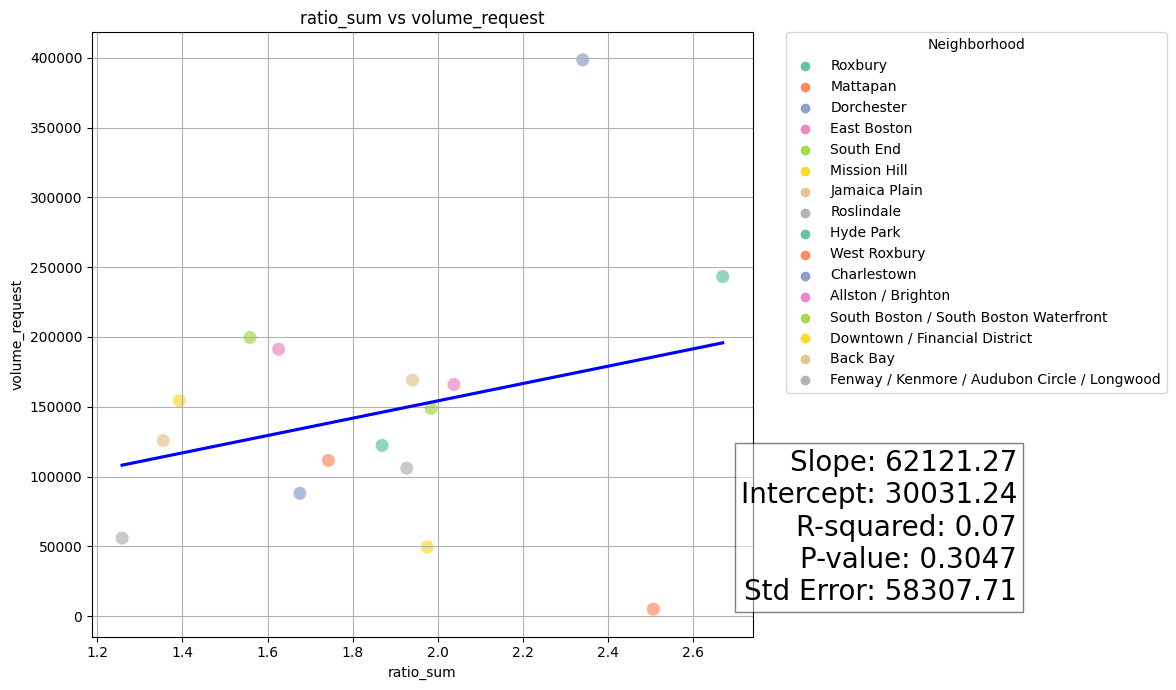

In [250]:
from scipy import stats

# Perform the regression
target_var = 'ratio_sum'
measure_var = 'volume_request'
X = neighborhood_plotting_df[target_var]
y = neighborhood_plotting_df[measure_var]
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# Create the scatter plot
plt.figure(figsize=(12, 7))
# Create scatter plot
scatter = sns.scatterplot(
    x=target_var, 
    y=measure_var, 
    data=neighborhood_plotting_df, 
    hue='neighborhood', 
    palette='Set2', 
    alpha=0.7, 
    s=100  # This increases the size of the scatter points
)

# Add regression line without confidence interval
sns.regplot(
    x=target_var, 
    y=measure_var, 
    data=neighborhood_plotting_df, 
    scatter=False, 
    ci=None,  # This removes the density shading (confidence interval)
    color='blue'
)



# Place the text with statistics on the plot
stats_text = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nR-squared: {r_value**2:.2f}\nP-value: {p_value:.4f}\nStd Error: {std_err:.2f}'
plt.text(1.4, 0.05, stats_text, ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=20, bbox=dict(facecolor='white', alpha=0.5))

# Improve layout
plt.xlabel(target_var)
plt.ylabel(measure_var)
plt.title(f'{target_var} vs {measure_var}')
plt.grid(True)  # This adds gridlines
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Neighborhood')  # Adjust legend

plt.tight_layout()  # Adjust layout to not cut off the legend
plt.show()

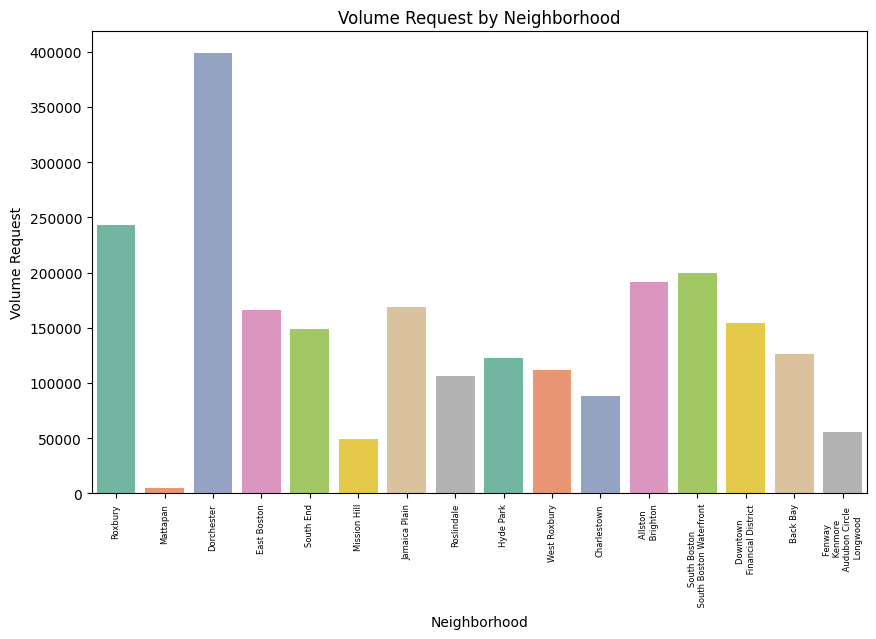

In [251]:
# bar plot by neighborhood  the volume request, sort by ratio_sum
plt.figure(figsize=(10,6))
sns.barplot(x=neighborhood_plotting_df.index, y='volume_request', data=neighborhood_plotting_df, palette='Set2', order=neighborhood_plotting_df.index)

# Set the parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=6)

# Set the new labels with line breaks at the spaces or customize as needed
new_labels = [label.get_text().replace("/", '\n') for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(new_labels, rotation=90)

plt.xlabel('Neighborhood')
plt.ylabel('Volume Request')

plt.title('Volume Request by Neighborhood')

plt.show()